In [10]:
import pandas as pd
import os
import string
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
os.chdir('/Users/colesprouse/Downloads/')

In [12]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')


### Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [15]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [16]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
df.drop(['date','rating','variation'],axis=1,inplace=True)

In [18]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [21]:
df[df.isnull()].sum()

verified_reviews    0.0
feedback            0.0
dtype: float64

/Users/colesprouse/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

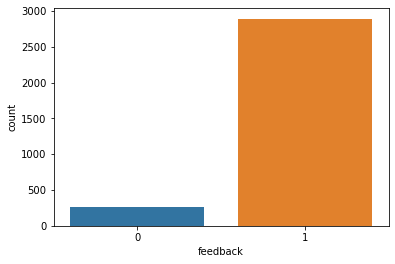

In [23]:
sns.countplot(df.feedback)

In [24]:
df.rename({'verified_reviews':'reviews'},axis=1,inplace=True)

In [80]:
df['length'] = df['reviews'].apply(len)


df.describe()

,feedback,length
count,3150.000000,3150.000000
mean,0.918413,132.049524
std,0.273778,182.099952
min,0.000000,1.000000
25%,1.000000,30.000000
50%,1.000000,74.000000
75%,1.000000,165.000000
max,1.000000,2851.000000


<AxesSubplot:>

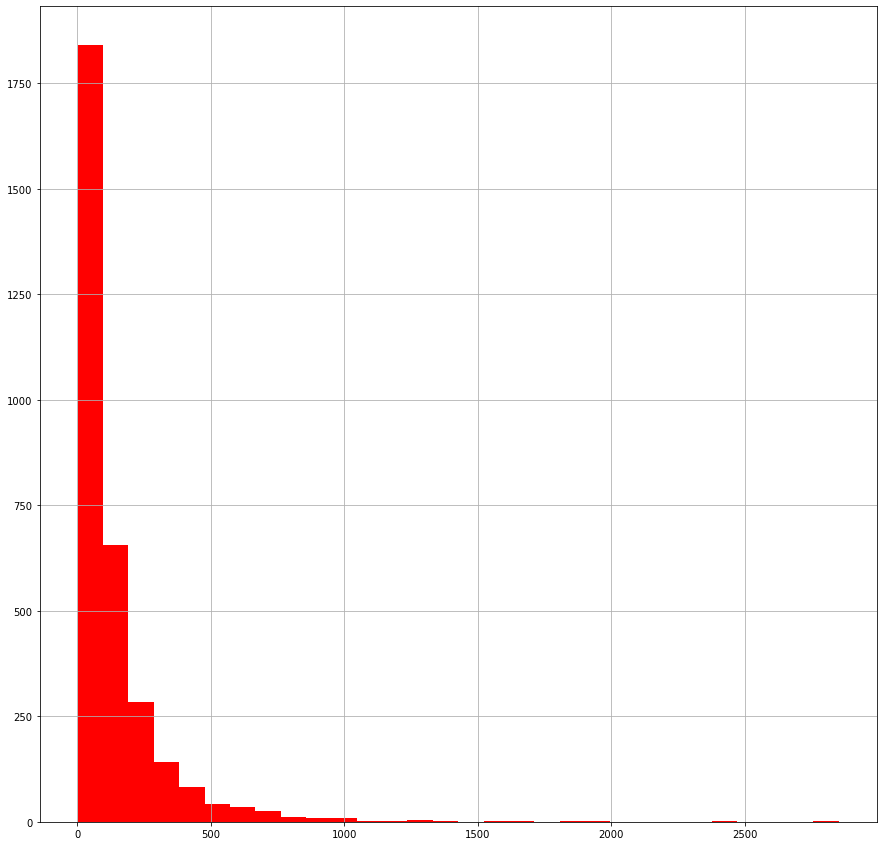

In [31]:
df['length'].hist(color='red',bins=30,figsize=(15,15))

In [32]:
positive = df[df.feedback == 1]

negative = df[df.feedback == 0]

In [35]:
psent = positive['reviews'].tolist()
psent_join = " ".join(psent)
nsent = negative['reviews'].tolist()
nsent_join = " ".join(nsent)

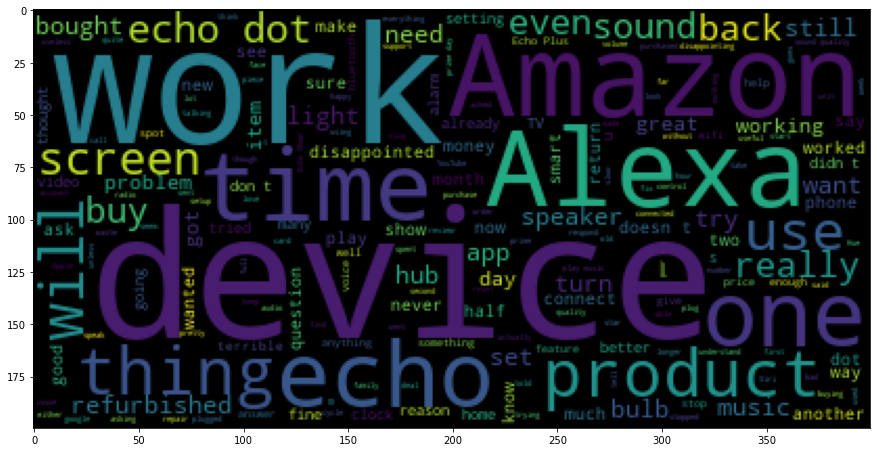

In [36]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(nsent_join))

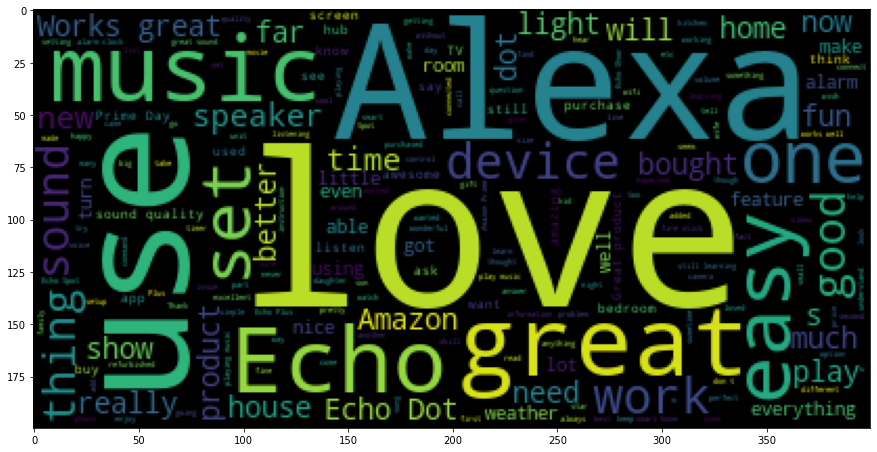

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(psent_join))

### Data Cleaning

In [40]:
def review_cleaning(review):
    Test_punc_removed = [char for char in review if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [41]:
cdf = df['reviews'].apply(review_cleaning)

In [42]:
cdf.sample(5)

1124                                     [Fun, tech, toy]
2588                                        [Great, love]
736     [Android, would, allow, Alexa, connect, Fortun...
2396                       [Purchased, Man, cave, loving]
1818    [learned, use, still, learning, pleased, Echo,...
Name: reviews, dtype: object

### Tokenization

In [44]:
vectorizer = CountVectorizer(analyzer=review_cleaning, dtype = np.uint8)
review_countvectorizer = vectorizer.fit_transform(df['reviews'])

In [46]:
X = pd.DataFrame(review_countvectorizer.toarray())

In [47]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = df['feedback']

In [50]:
X.shape

(3150, 5211)

In [51]:
y.shape

(3150,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

### Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.60      0.41      0.49        44
           1       0.96      0.98      0.97       586

    accuracy                           0.94       630
   macro avg       0.78      0.69      0.73       630
weighted avg       0.93      0.94      0.93       630



'\nYou can see in the heatmap that the Naive Bayes model has correcly classified 588 samples\nand misclassified 38 samples\n'

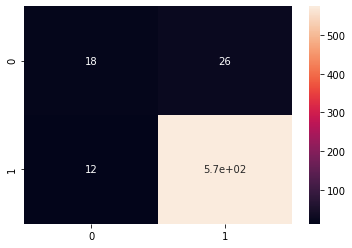

In [88]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)
                                                    
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

'''
You can see in the heatmap that the Naive Bayes model has correcly classified 588 samples
and misclassified 38 samples
'''

### Logistic Regression Model

              precision    recall  f1-score   support

           0       0.75      0.14      0.23        44
           1       0.94      1.00      0.97       586

    accuracy                           0.94       630
   macro avg       0.84      0.57      0.60       630
weighted avg       0.93      0.94      0.92       630



'\nYou can see in the heatmap that the Naive Bayes model has correcly classified 588 samples\nand misclassified 38 samples\n'

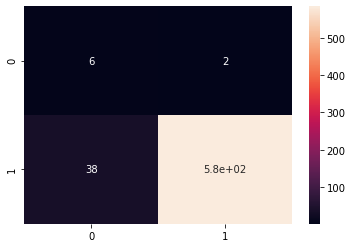

In [85]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))
'''
You can see in the heatmap that the Logistic Regression Model has correcly classified 586 samples
and misclassified 40 samples
'''

### Gradient Boosting Model

              precision    recall  f1-score   support

           0       0.75      0.14      0.23        44
           1       0.94      1.00      0.97       586

    accuracy                           0.94       630
   macro avg       0.84      0.57      0.60       630
weighted avg       0.93      0.94      0.92       630



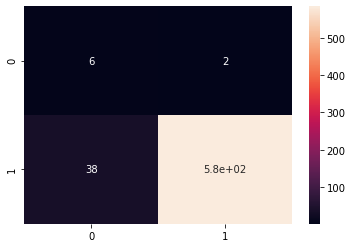

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

modelGBT = GradientBoostingClassifier()
modelGBT.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred)
'''
You can see in the heatmap that the Gradient Boosting Model has correcly classified 586 samples
and misclassified 40 samples
'''

### Model Comparison

,name,score
0,Naive Bayes,0.939683
1,Logistic Regression,0.953968
2,Gradient Boosting,0.938095


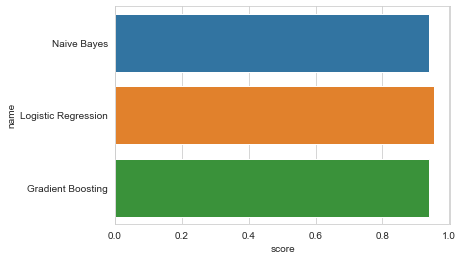

In [91]:
names = ['Naive Bayes','Logistic Regression','Gradient Boosting']
models = [NB_classifier,modelLR, modelGBT]
scores = []
for name, model in zip(names,models):
    score = model.score(X_test, y_test)
    scores.append(score)
df_model_comparison = pd.DataFrame()
df_model_comparison['name'] = names
df_model_comparison['score'] = scores
cm = sns.light_palette('green', as_cmap = True)
s = df_model_comparison.style.background_gradient(cmap = cm)
sns.set_style('whitegrid')
ax = sns.barplot(y = 'name',x='score',data = df_model_comparison)
s

### As you can see the logistic regression model has the highest accuracy score out of the three models